<center>
    <h1> ILI286 - Computación Científica II </h1>
    <h2> Tarea 4 </h2>
    <h2> [S]cientific [C]omputing [T]eam </h2>
    <h3> _5 de Mayo 2017_ </h3>
</center>

# Tabla de Contenidos
* [1.- Objetivos](#obj)
* [2.- Introducción](#intro)
* [3.- Explicación](#explicacion)
* [4.- Preguntas](#preguntas)
     - [Pregunta 1](#pregunta1)
     - [Pregunta 2](#pregunta2)
     - [Pregunta 3](#pregunta3)
     - [Pregunta 4](#pregunta4)
* [4.- Instrucciones](#instr)
* [5.- Referencias](#ref)

<div id='obj' />
# 1. _Objetivos_

Para la presente tarea se tiene por objetivos:

<ol>
<li> Estudiar un caso de aplicación de problemas condición de frontera </li>
<li> Aprender y analizar métodos mas complejos para la solución numérica de sistemas ecuaciones no lineales (raíces)</li>
<li> Realizar un análisis al método de disparo aplicado a un sistema de ecuaciones </li>

</ol>

<div id='intro' />
# 2. _Introducción_ 

En este laboratorio se analizará como resolver sistemas de ecuaciones diferenciales no lineales a travez del _shooting method_.  Ademas veremos su uso en aplicaciones reales, como lo es el modelo _SIR_, que explica la evolución de una enfermedad infecciosa creada por un virus o una bacteria.

<div id='explicacion' />
# 3. _Explicación_ 

El modelo SIR es un modelo básico que explica la evolución de una enfermedad infecciosa creada por un virus o una bacteria. Un ejemplo de este tipo de enfermedades es la gripe A o el ébola. 

Este modelo consiste en un sistema de 3 **_EDO’s_ no lineales** que no posee una solución explícita. Sin embargo, usando herramientas matemáticas y computacionales podemos extraer información acerca de las soluciones del sistema. El modelo SIR es un modelo compartimental porque divide a la población en 3 compartimentos:

* _S(t)_: Representa al número de individuos susceptibles, individuos sanos que al entrar en contacto con la enfermedad pueden resultar infectados, en función del tiempo.

* _I(t)_: Representa al número de individuos infectados, individuos que pueden transmitir la enfermedad al grupo _S(t)_, en función del tiempo.

* _R(t)_: Representa al número de individuos retirados, individuos que se han recuperado de la enfermedad y se han vuelto inmunes o han muerto, en función del tiempo.

Ademas, se realizan las siguientes hipotesis:

* La población se mantiene constante, es decir, no se tienen en cuenta los nacimientos y muertes que se producen a lo largo del desarrollo de la enfermedad. Si denotamos por _N_ a la población total de individuos tenemos que la suma del número de individuos de cada uno de los 3 grupos es igual al total de la población:

$$N = S(t) + I(t) + R(t)$$

* La enfermedad se transmite por contacto directo entre las personas.
* En cuanto un individuo es infectado pasa a estar en el grupo de los infectados.
* Los individuos del grupo _I(t)_ se acaban recuperando de la enfermedad y adquieren la inmunidad o mueren (pasando en ambos casos al grupo _R(t)_).

La formulación del modelo nos lleva al siguiente sistema de ecuaciones diferenciales ordinarias no lineales:

$$
\begin{array}{ll}
\displaystyle \frac{dS}{dt} = -\beta\cdot S(t)\cdot I(t) & \displaystyle S(0)= S_0\\
\\
\displaystyle \frac{dI}{dt} = \beta\cdot S(t)\cdot I(t) - \alpha\cdot R(t) & \displaystyle I(0)=I_0\\
\\
\displaystyle \frac{dR}{dt} = \alpha\cdot R(t) & \displaystyle R(0)=R_0\\
\end{array}
$$

donde $S_0,I_0$ y $R_0$ son valores iniciales que tiene cada ecuación, y $\alpha > 0, \beta > 0$ son tasas que usted tendrá que analizar más adelante.

En el año 1978 se informó a la conocida revista British Medical Journal de un brote de gripe en un internado del norte de Inglaterra que se extendió del 22 de enero al 4 de febrero, afectando a una poblacion de 763 personas. Lamentablemente, debido a una falla del sistema se ha perdido la información de la evolución de esta epidemia. Uno de los datos recuperados es el siguiente: La cantidad de personas **infectadas** a los 14 dias es 23. Se le ha pedido entonces al curso de _Computación Cientifica 2_ que analize y resuelva este problema.

Para este ejercicio ,se va a implementar el 'método del disparo' para el sistema de ecuaciones presentado, de modo que para encontrar encontrar la raiz <code>F(s) = 0 </code> es necesario un método mas complejo que el método de bisección, de modo que introducimos el <em>método de Broyden</em>$^1$ 

<div id='broy' />
<h3> Broyden's Method </h3>
<p>En análisis numérico, el método de Broyden es un método quasi-Newtoniano para encontrar raíces en un sistema de <code>k</code> variables. El conocido método de Newton es usado para encontrar un x tal que <code>f(x) = 0</code>, y para ello usa la matriz jacobiana <b><code>J</code></b>. Sin embargo, calcular esta matriz puede resultar en un costo computacional muy alto en algunos casos. La idea del método de Broyden es calcular la matriz jacobiana solo en la primera iteración, y generar actualizaciones en las siguientes iteraciones. </p>

<p> El pseudocódigo para el método de Broyden es el siguiente. Note que como parametros de entrada se necesita un vector de soluciones inicial $x_0$ y una matriz $B_0$ , la cual si es imposible de calcular, se puede usar $B_0 = I$: </p>
<h3> Broyden's Method PseudoCode </h3>

$1. \enspace x_0 = Initial Vector $

$2. \enspace B_0 = Initial Matrix $

$3. \enspace \textbf{for }  i = 0,1,2,...$

$4. \quad \quad x_{i+1} = x_{i} - B_{i} F(x_i)$

$5. \quad \quad B_{i+1} = B_{i} + \frac{(\delta_{i+1} - B_{i}\Delta_{i+1})\delta_{i+1}^T B_i}{\delta_{i+1}^T B_i\Delta_{i+1}}$

$6.\enspace \textbf{end}$

$7. \quad \quad where \enspace  \delta_i = x_i - x_{i-1} and \enspace \Delta_i = F(x_i) - F(x_{i-1})$



<div id='preguntas' />
# 4. _preguntas_ 

<div id='pregunta1' />
### Pregunta 1

<ul style="list-style-type: none;">
<li>
        
        <b>a)</b> Implemente el método de Broyden. Recuerde que para analizar la raiz de $F(x)$ en un sistema de ecuaciones debe analizar $||F(x)||_{2}$. Para comprobar el correcto funcionamiento del método, impleméntelo en el sistema de ecuaciones: 
        
        $$ F(x) = \begin{pmatrix} x_2^2 - x_1^3  \\ x_1^2 + x_2^2 - 1 \end{pmatrix} $$
        $$ x_0 =  \begin{pmatrix} 1 \\ 1 \end{pmatrix} \quad \quad B_{0} = F^{'}(x_0) $$
 <p> Compruebe sus resultados con la libreria <code> scipy.optimize.broyden2 </code> el cual tiene el método de Broyden II implementado. Analize el error absoluto entre el valor obtenido mediante la función implementada por usted y la función de <code> scipy.optimize. </code>    </p> $$$$ Explique ademas que sucede si aumenta uno de los 2 valores iniciales.
 
</ul>

<div id='pregunta2' />
### Pregunta 2

<ul style="list-style-type: none;">

    <li><b>b) </b> Resuelva el modelo _SIR_ con _Shooting Method_ para valores $\alpha = 0.4477$ y $\beta = 0.0022$. Dado que es un sistema de ecuaciones, la función _F_ debe tener al menos como parámetros de entrada los valores iniciales que no se encuentran estimados en el enunciado $I(0)$, y retornar el valor final que se encuentran en el enunciado $I(14)$. Recuerde que dado _Shooting Method_ es necesario usar un ODE-Solver para resolver Problemas de Valor Inicial (_IVP_) como _Euler Method_.
    $$$$
    Es recomendable que implemente una función que tome como parámetro un array de funciones (las 3 funciones del sistema de ecuaciones) y resuelva a la vez todas las funciones.
    </li>
    
</ul>

<div id='pregunta3' />
### Pregunta 3

<ul style="list-style-type: none;">
    <li> <b>c)</b> Grafique las soluciones del punto anterior es un único gráfico con respecto al tiempo. Para esto, guarde los valores de _S_,_I_ y _R_ en cada iteración, y grafiquelos con _plot_. Concluya que significa las curvas que genera su función. Puede usar la función _broyden_ que creo en el item 1 o usar la función <code>scipy.optimize.broyden2</code> de _python_. 
    </li>$$$$
    
</ul>

<div id='pregunta4' />
### Pregunta 4

<ul style="list-style-type: none;">
    <li> <b>d)</b> Como se mencionó antes, deberá descubir que significan las tasas $\alpha$ y $\beta$. Para esto, usando las mismas condiciones iniciales y finales, use la funcion <code> interact </code> de la libreria <code> ipywidgets </code>$^2$, donde **$\alpha \in \text{ }$[0.0011, 0.0022]** y **$\beta \in \text{ }$[0.4477, 0.8888]**. Para esto, deje una tasa fija y varíe la otra, y explique que sucede con las curvas generadas, concluyendo además que significa cada tasa y como influye su aumento o disminución en el gráfico. 
    </li>
    
</ul>

<div id='pregunta5' />
### Pregunta 5

<ul style="list-style-type: none;">
    <li> <b>e)</b>  En la siguiente tabla aparecen los datos del número real de personas enfermas cada día:    
    </li>
</ul>

| Día     |  Infectados reales  |
|:-------:|:-------------------:|
|    1    |         3           |
|    2    |         8           |
|    3    |         28          |
|    4    |         75          |
|    5    |         221         |
|    6    |         291         |
|    7    |         255         |
|    8    |         235         |
|    9    |         190         |
|    10   |         125         |
|    11   |         70          |
|    12   |         28          |
|    13   |         12          |
|    14   |         5           |


    
    
<ul style="list-style-type: none;">   
    <li> Se sabe además que la epidemia comenzó con un infectado, y que la poblacion inicial es de 763 personas. Determine los valores reales de $\alpha$ y $\beta$ que mejor se ajusten al caso, y explique los pasos que realizó para obtenerlos. Para esto, debera realizar una estimación de $\alpha$ y $\beta$ usando las condiciones iniciales y el sistema de ecuaciones. Grafique el resultado con su estimación de $\alpha$ y $\beta$ versus la estimación con valores reales. Para esto, use el siguiente formato:
    </li>
</ul>    

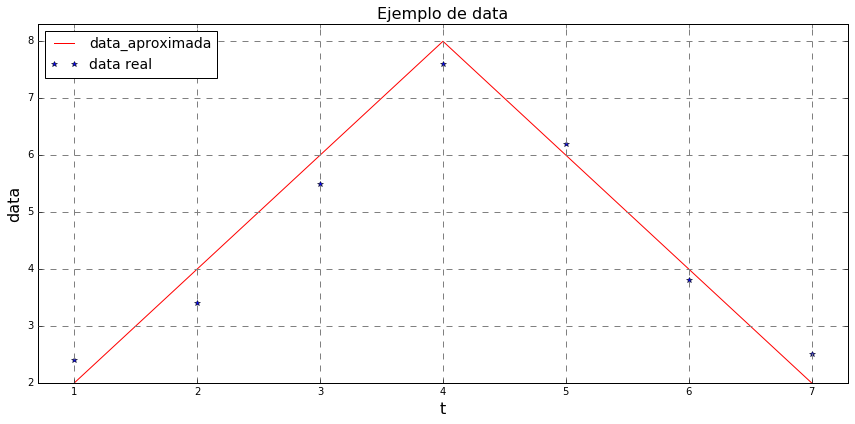

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Data a graficar
t = [1,2,3,4,5,6,7]
data_real = [2,4,6,8,6,4,2]
data_aproximada = [2.4,3.4,5.5,7.6,6.2,3.8,2.5]

fig = plt.figure(figsize=(12, 6)) 
#Grafica de la data real
plt.plot(t,data_real,'-r', label = 'data_aproximada')
plt.hold(True)
#Grafica de la data aproximada
plt.plot(t, data_aproximada,'*', label = 'data real')
plt.grid(True)
plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
plt.title("Ejemplo de data",fontsize = 16, verticalalignment = 'baseline', horizontalalignment = 'center')
plt.axis('tight')
plt.legend(loc = 2,prop={'size':14})
plt.xlabel("t", fontsize = 16)
plt.xlim(min(t)-0.3,max(t) + 0.3)
plt.ylim(min(data_real),max(data_real) + 0.3)
plt.ylabel("data", fontsize = 16)

plt.tight_layout()
plt.show()

Una vez que tenga sus valores iniciales, debera encontrar los parametros $\alpha$ y $\beta$ que minimize la siguiente función:

$$ \displaystyle \sum_{i = 0}^{14} \left(\hat{I}(i) - I(i)\right)^2$$

Donde $I(i)$ es el número real de infectados en el día _i_ y $\hat{I}(i)$ es el número aproximado de individuos infectados que se ha obtenido resolviendo numéricamente el sistema de ecuaciones antes propuesto. Grafique la función con sus nuevas tasas versus los valores reales y concluya si su resultado es aceptable. Para minimizar puede hacer uso de la funcion <code>scipy.optimize.fmin</code>$^3$

_Hint1: Si la derivada de un punto nos da 0, quiere decir que hemos alcanzado el máximo de la función._ 


_Hint2: Recuerde los métodos de integración del laboratorio pasado. Tal vez no conocemos la función dentro de una integral, pero si los valores que tiene la función en distintos instantes._

<div id='instr' />
# 4. _Instrucciones_:
 
 
* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter` notebook (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados cuando se indique.
* El archivo de entrega debe denominarse Tarea1-rol.tar.gz, y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las bibliotecas extras utilizadas.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código aunque sí se sugiere discutir aspectos generales con sus compañeros. En caso de sospecha de copia, se citará a los involucrados a defender sus conocimientos de manera presencial, evaluación cuya nota reemplazará la obtenida en la tarea.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.

<div id='ref' />
# 5. _Referencias_:

* 1.- Pagina 133 del libro guia del curso _Numerical Analysis by Timothy Sauer_
* 2.- Documentacion de _Interact_:
    - http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
* 3.- Documentación de la funcion _fmin_:
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html